In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("AirPassengers.csv")


In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [5]:
data_= lambda dates:pd.datetime.strptime(dates, '%Y-%m')

In [6]:
data= pd.read_csv("AirPassengers.csv", parse_dates=['Month'], index_col= 'Month', date_parser=data_)

C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()

In [7]:
data.dtypes

#Passengers    int64
dtype: object

In [8]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
ts = data['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

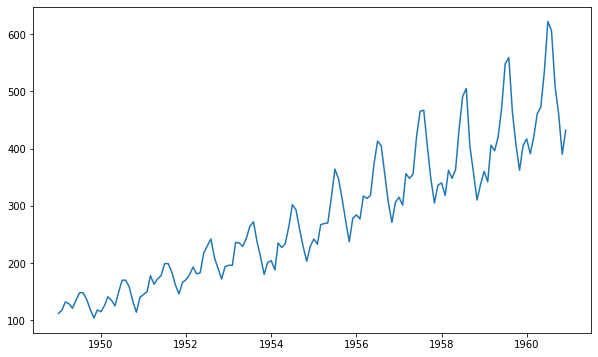

In [10]:
plt.figure(figsize=(10,6))
plt.plot(ts)

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [35]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationaryADF = None
        self.isStationaryKPSS = None
        
    def test_stationarity(self, timeseries):
    
        #Determining Rolling Stats
        rolmean=timeseries.rolling(12).mean()
        rolstd=timeseries.rolling(12).std()
        
        #PLot the graph
        plt.figure(figsize=(10,6))
        Mean= plt.plot(rolmean, color='red', label="Rolling Mean")
        Original= plt.plot(timeseries, color='blue', label="Original")
        Std= plt.plot(rolstd, color='green', label="Rolling Standard Deviation")
        plt.xlabel("Time")
        plt.ylabel("No. of Passengers")
        plt.legend(loc='best')
        plt.title( "Rolling Mean & Standard Deviation")
        plt.grid(True)
        plt.show()

        #Augemented Dickey-Fuller Test
        print('\n\n\n')
        print("Results of ADF test:")
        dftest=adfuller(timeseries, autolag= "AIC") 
        #if “AIC” (default) or “BIC”, then the number of lags is chosen to minimize the corresponding information criterion
        self.pValue = dftest[1]
        
        if (self.pValue < self.SignificanceLevel):
            self.isStationaryADF = True
        else:
            self.isStationaryADF = False
        
        dfoutput= pd.Series(dftest[0:4], index= ["Test Statistic", 'p-value'," #Lags Used", 'Number of Observations used'])

        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput)
        print("Is the time series stationary for ADF? {0}".format(self.isStationaryADF))
        
        # KPSS test
        print('\n\n\n')
        print ('Results of KPSS Test:')
        kpsstest = kpss(timeseries, regression='c') # c stands for constant only
        self.pValue=kpsstest[1]
        if (self.pValue< self.SignificanceLevel):
            self.isStationaryKPSS = False
        else:
            self.isStationaryKPSS = True

        kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
        for key,value in kpsstest[3].items():
            kpss_output['Critical Value (%s)'%key] = value
        print (kpss_output)
        print("Is the time series stationary for KPSS? {0}".format(self.isStationaryKPSS))

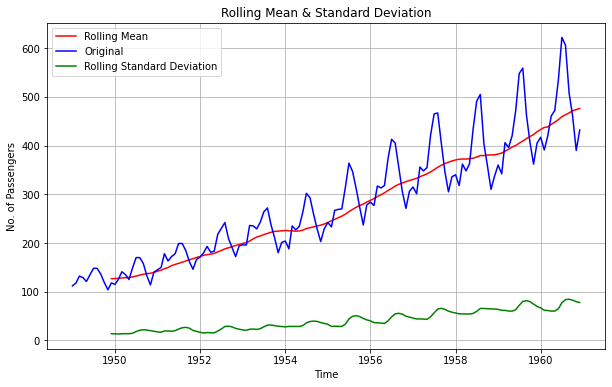





Results of ADF test:
Test Statistic                   0.815369
p-value                          0.991880
 #Lags Used                     13.000000
Number of Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Is the time series stationary for ADF? False




Results of KPSS Test:
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Is the time series stationary for KPSS? False


C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [13]:
stationary = StationarityTests()
stationary.test_stationarity(ts)

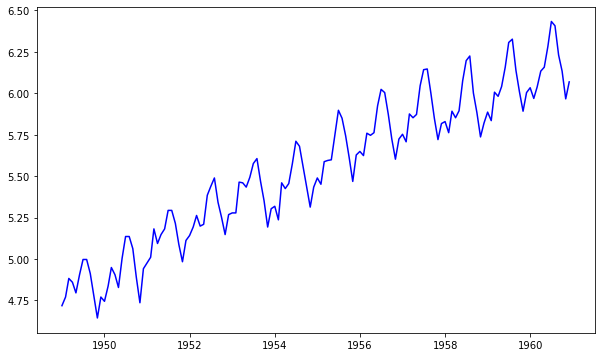

In [14]:
ts_log=np.log(ts)
plt.figure(figsize=(10,6))
plt.plot(ts_log, color='blue')

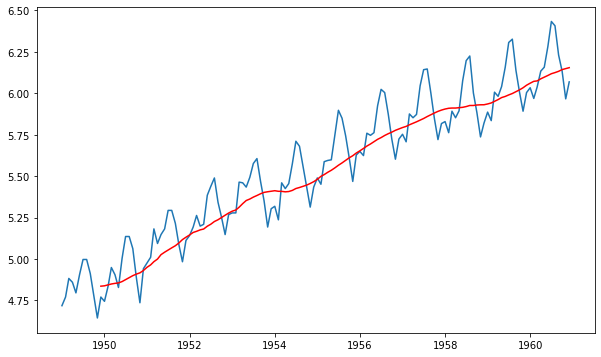

In [15]:
#Estimate Trend using MA
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(10,6))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [16]:
#Eliminating trend
ts_log_moving_avg_diff= ts_log- moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)

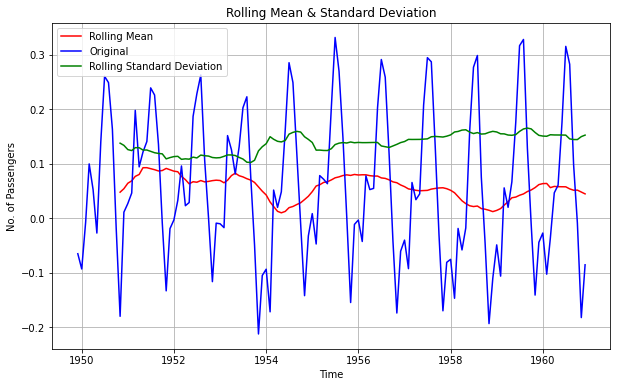





Results of ADF test:
Test Statistic                  -3.162908
p-value                          0.022235
 #Lags Used                     13.000000
Number of Observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64
Is the time series stationary for ADF? True




Results of KPSS Test:
Test Statistic            0.152538
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Is the time series stationary for KPSS? True


C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [36]:
staionary_ = StationarityTests()
staionary_.test_stationarity(ts_log_moving_avg_diff)

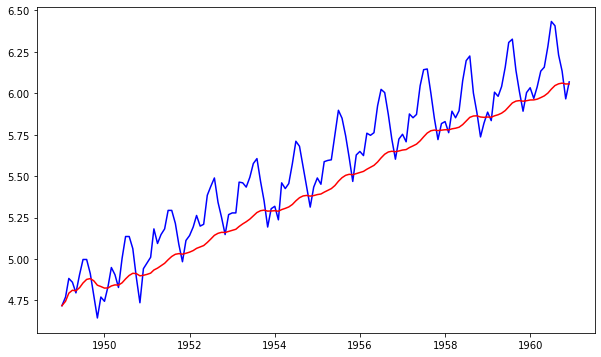

In [28]:
# Applying Expected Weighted Moving Average
exp = ts_log.ewm(halflife=12).mean()
plt.figure(figsize=(10,6))
plt.plot(ts_log, color= 'blue')
plt.plot(exp, color='red')

In [29]:
# Eliminating trend
ts_log_exp_diff= ts_log-exp

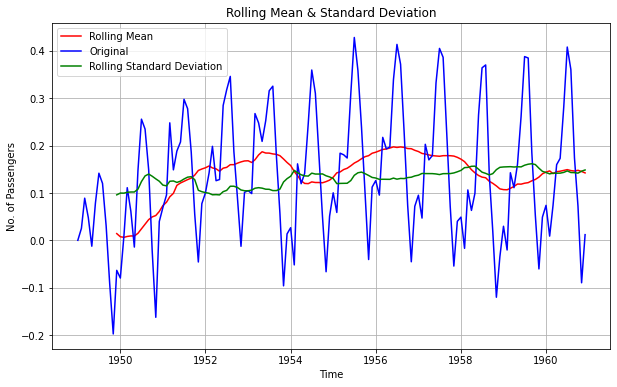





Results of ADF test:
Test Statistic                  -3.601262
p-value                          0.005737
 #Lags Used                     13.000000
Number of Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Is the time series stationary for ADF? True




Results of KPSS Test:
Test Statistic            0.310076
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Is the time series stationary for KPSS? True


C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [37]:
stationarity_exp=StationarityTests()
stationarity_exp.test_stationarity(ts_log_exp_diff)

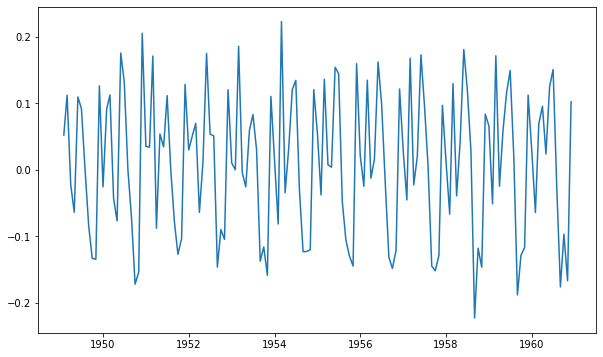

In [40]:
#Eliminating Trend and seasonality
# Differencing

ts_log_differencing= ts_log- ts_log.shift()
plt.figure(figsize=(10,6))
plt.plot(ts_log_differencing)

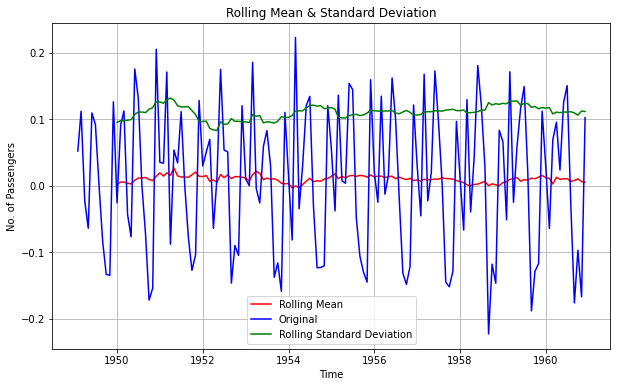





Results of ADF test:
Test Statistic                  -2.717131
p-value                          0.071121
 #Lags Used                     14.000000
Number of Observations used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64
Is the time series stationary for ADF? False




Results of KPSS Test:
Test Statistic            0.101545
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Is the time series stationary for KPSS? True


C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [42]:
ts_log_differencing.dropna(inplace=True)
differencing=StationarityTests()
differencing.test_stationarity(ts_log_differencing)

In [43]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

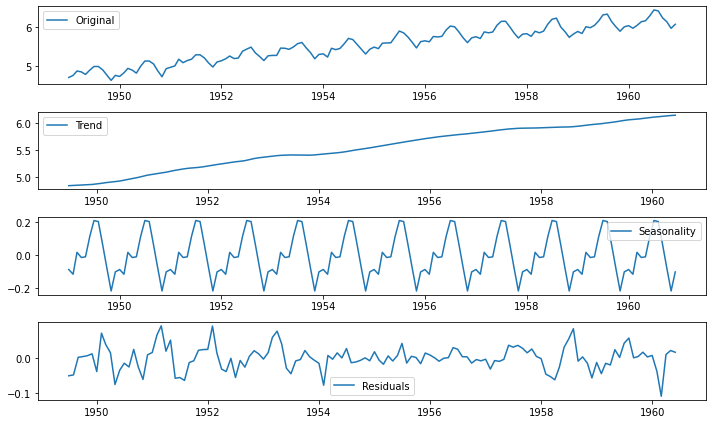

In [52]:
decompose=seasonal_decompose(ts_log)
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best') #best means axes

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

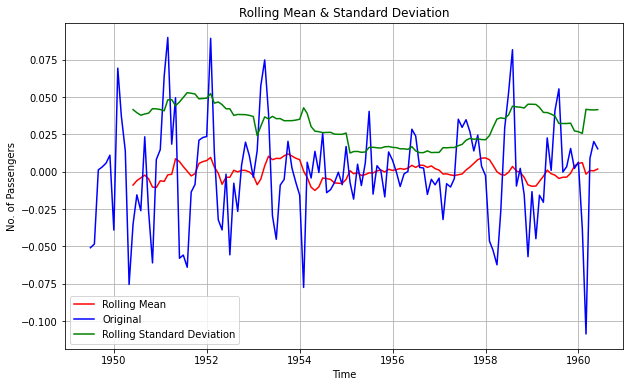





Results of ADF test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
 #Lags Used                    9.000000e+00
Number of Observations used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64
Is the time series stationary for ADF? True




Results of KPSS Test:
Test Statistic            0.094836
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Is the time series stationary for KPSS? True


C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [53]:
#Checking for stationarity in the residual
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
stationary_dec= StationarityTests()
stationary_dec.test_stationarity(ts_log_decompose)

In [54]:
#To forecast Auto Regressive Integrated Moving Average

''''Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. 
For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. 
For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the
moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order 
difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1.
Both will generate same results.'''






''''Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. 
For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 
being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but
after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the 
correlation but remove the effects already explained by lags 1 to 4.'''


#AutoCorrelationFactor and PartialAutoCorrelationFactor plots:
from statsmodels.tsa.stattools import acf, pacf

In [57]:
lag_acf = acf(ts_log_differencing, nlags=20)
lag_pacf = pacf(ts_log_differencing, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

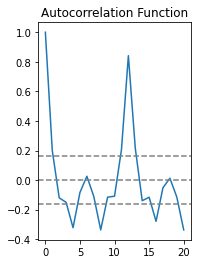

In [59]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_differencing)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_differencing)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

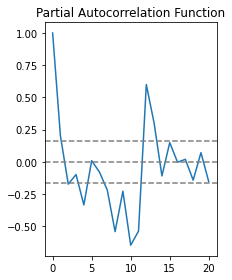

In [63]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_differencing)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_differencing)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [66]:
''''p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
If you notice closely, in this case p=2.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. 
If you notice closely, in this case q=2.'''''

"'p – The lag value where the PACF chart crosses the upper confidence interval for the first time. \nIf you notice closely, in this case p=2.\nq – The lag value where the ACF chart crosses the upper confidence interval for the first time. \nIf you notice closely, in this case q=2."

C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

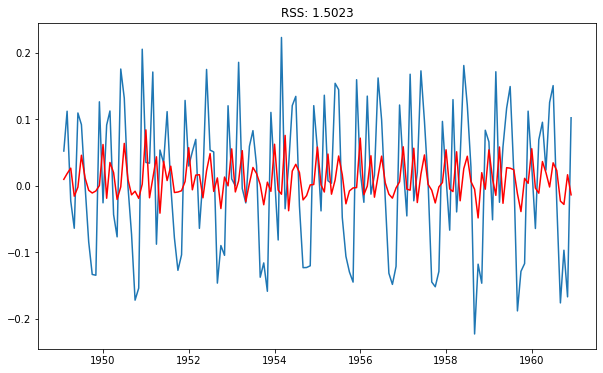

In [69]:
#ARIMA for p=2, q=2, d=0
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(10,6))
plt.plot(ts_log_differencing)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_differencing)**2))

C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

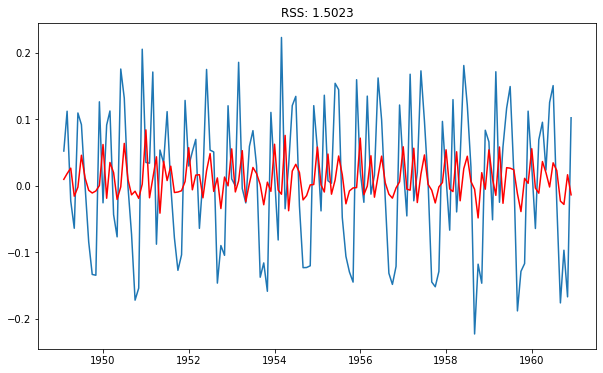

In [70]:
model_ = ARIMA(ts_log_differencing, order=(2, 1, 0))  
results_AR_ = model.fit(disp=-1)  
plt.figure(figsize=(10,6))
plt.plot(ts_log_differencing)
plt.plot(results_AR_.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR_.fittedvalues-ts_log_differencing)**2))

C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

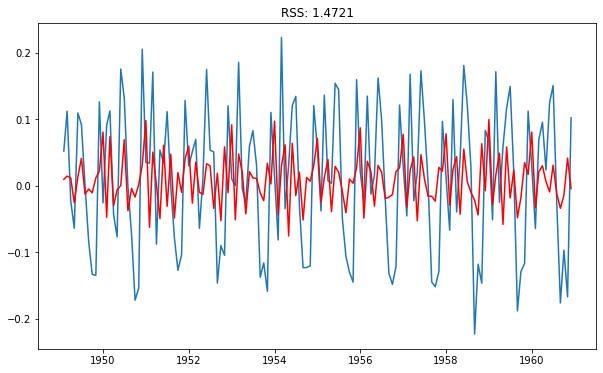

In [71]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(10,6))
plt.plot(ts_log_differencing)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_differencing)**2))


C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\anaconda3\envs\Deep Learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

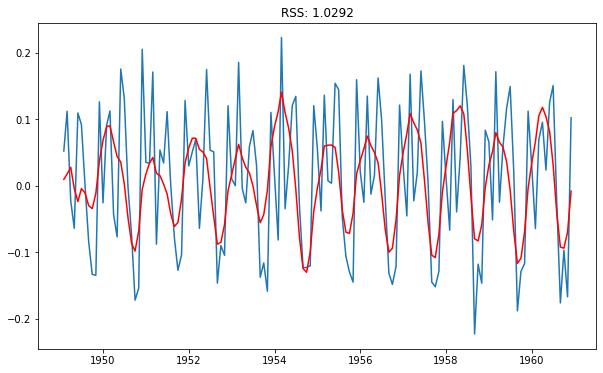

In [73]:
#Combined
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 
plt.figure(figsize=(10,6))
plt.plot(ts_log_differencing)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_differencing)**2))


In [75]:
#Adding everything back
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [76]:
# Adding differences
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [81]:
'''we’ve to add them to base number. For this lets create a series with all values as
base number and add the differences to it. This can be done as:'''

predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1044')

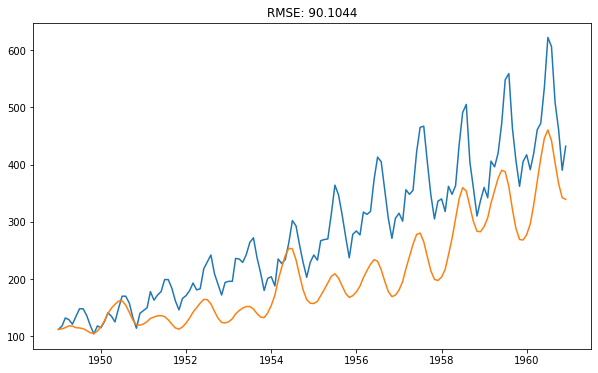

In [84]:
#Eliminating log
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(10,6))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [1]:
x=[1,2,3,4,5,6,7,8,9,10]


In [4]:

x[1:4]
print(x[0:-1])
print(x[0:])
print(x[-1])

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10


In [9]:
y= pd.Series(x[4:] - x[:-4])

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [19]:
y=x[:-2]
z=x[2:]

In [22]:
print(z)
print(y)

[3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8]
